In [165]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt


In [166]:
df_original = pd.read_csv('data/data.csv')
df_original.shape #--> in Summe Liste mit 33.000 Einträgen
df_original.head()
#
# df_original.query('country == "Kenya"')
# df_original.dropna(inplace = True)
# df_original.info()
for column in df_original.columns:
    print (df_original[column].unique())
#df_original.columns.unique()



['Kenya' 'Rwanda' 'Tanzania' 'Uganda']
[2018 2016 2017]
['uniqueid_6056' 'uniqueid_6060' 'uniqueid_6065' ... 'uniqueid_6069'
 'uniqueid_6070' 'uniqueid_6071']
['Urban' 'Rural']
['Yes' 'No']
[ 3  7  6  4  1  5  2  9 10 11  8 12 13 16 15 14 18 20 21 17]
[ 30  51  77  39  16  25  32  24  22  42  18  20  19  26  35  68  70  34
  95  27  21  45  52  44  75  60  33  36  53  64  66  23  78  38  46  76
  82  41  28  17  50  48  55  37  57  91  87  56  40  59  73  47  74  43
  79  49  58  31  54  63  29  62  90  84  72  65  80  61  67  69  86  85
  71  83  81  93  88  94  89  99  92 100  97  98  96]
['Male' 'Female']
['Head of Household' 'Parent' 'Child' 'Spouse' 'Other relative'
 'Other non-relatives']
['Married/Living together' 'Single/Never Married' 'Divorced/Seperated'
 'Widowed' 'Dont know']
['Secondary education' 'Vocational/Specialised training'
 'No formal education' 'Primary education' 'Other/Dont know/RTA'
 'Tertiary education']
['Formally employed Government' 'Formally employed Priva

In [167]:
df_original.relationship_with_head.unique()

array(['Head of Household', 'Parent', 'Child', 'Spouse', 'Other relative',
       'Other non-relatives'], dtype=object)

In [168]:
df = pd.read_csv('data/data.csv')
df.dropna(axis=0, inplace=True)


df.replace(["Yes",'No'],[1,0], inplace=True)
#df.replace({'Yes':1, 'No':0}, inplace = True)

# display (df.iloc[1:2,2:10].T)  #bei iloc kann man die Ziffer nehmen, startet von 0 weg.
# df.loc[10086:12000,['country', 'cellphone_access']]   #Bei loc muss man Index und Spaltenname nehmen

# Make bins for age in train
age_bins = pd.cut(df['age_of_respondent'], [0, 20, 40, 60, 200], labels=['age < 20', '20 < age < 40', '40 < age < 60', ' age > 60'])
age_bins.name = 'ages_binned'

df = df.join(age_bins, how='inner')
#train = train.drop('age_of_respondent', axis=1)
df.head(10)


,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,bank_account,ages_binned
10086,Kenya,2018,uniqueid_1,Rural,1,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,1,20 < age < 40
10087,Kenya,2018,uniqueid_2,Rural,0,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,0,age > 60
10088,Kenya,2018,uniqueid_3,Urban,1,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,1,20 < age < 40
10089,Kenya,2018,uniqueid_4,Rural,1,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,0,20 < age < 40
10090,Kenya,2018,uniqueid_5,Urban,0,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,0,20 < age < 40
10091,Kenya,2018,uniqueid_6,Rural,0,7,26,Female,Spouse,Married/Living together,Primary education,Informally employed,0,20 < age < 40
10092,Kenya,2018,uniqueid_7,Rural,1,7,32,Female,Spouse,Married/Living together,Primary education,Self employed,0,20 < age < 40
10093,Kenya,2018,uniqueid_8,Rural,1,1,42,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government,0,40 < age < 60
10094,Kenya,2018,uniqueid_9,Rural,1,3,54,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing,1,40 < age < 60
10095,Kenya,2018,uniqueid_10,Urban,1,3,76,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent,0,age > 60


country                   0.250659
year                      0.250659
uniqueid                  0.250659
location_type             0.250659
cellphone_access          0.250659
household_size            0.250659
age_of_respondent         0.250659
gender_of_respondent      0.250659
relationship_with_head    0.250659
marital_status            0.250659
education_level           0.250659
job_type                  0.250659
bank_account              0.250659
ages_binned               0.250659
dtype: float64

'd.h. 25 % aller Menschen (egal ob Mann oder Frau), die in der Tabelle erfasst wurden, haben ein Bankkonto'

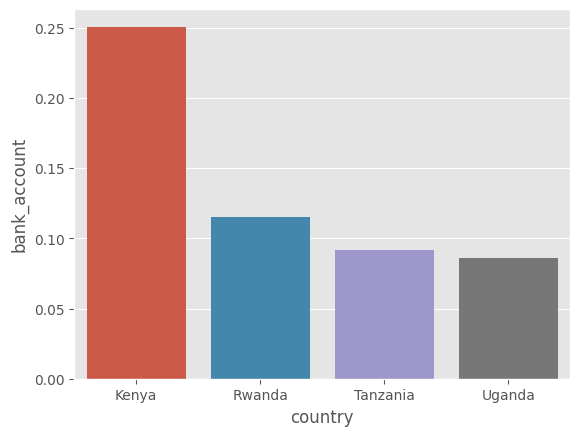

In [169]:
a = df.query('country== "Kenya" and bank_account == 1').count()
b = df.query('country == "Kenya"').count()

display (a / b)
#sns.barplot(data=df,x='country', y = 'bank_account', hue = 'location_type')
sns.barplot(data=df,x='country', y = 'bank_account', errorbar=None)

display ('d.h. 25 % aller Menschen (egal ob Mann oder Frau), die in der Tabelle erfasst wurden, haben ein Bankkonto')

In [170]:
countr = ['Kenya', 'Rwanda', 'Tanzania', 'Uganda']
inhab_10E6 = [[90,13.46,63.59,45.85]]                   
df_inhab = pd.DataFrame(inhab_10E6, columns=countr)

df_inhab.head()

,Kenya,Rwanda,Tanzania,Uganda
0,90,13.46,63.59,45.85


<Figure size 640x480 with 0 Axes>

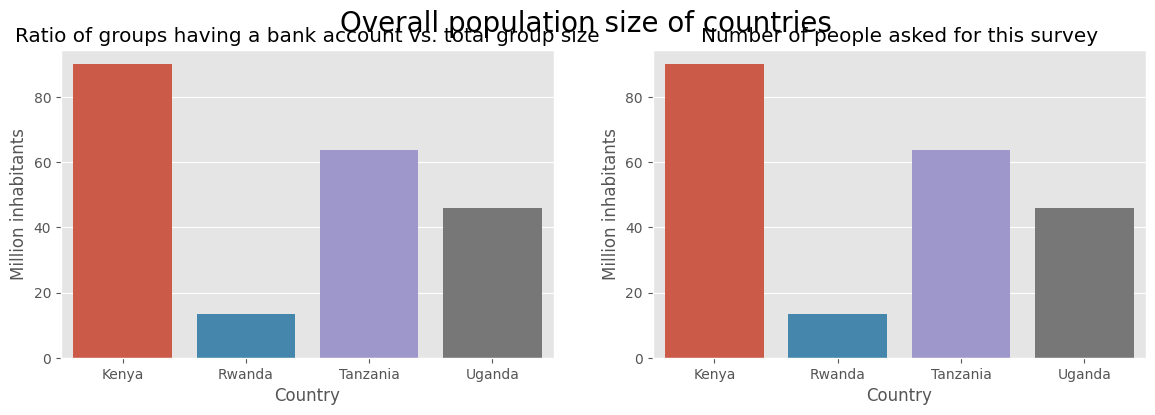

In [171]:
plt.figure()
plt.figure(figsize=(14,4))  # figsize=(float, float) : Width, height in inches
plt.suptitle("Overall population size of countries", fontsize=20) # add a super title to the container
plt.subplots_adjust(hspace=0.5)
plt.style.use('ggplot')

#----------------
plt.subplot(1,2,1) # (rows, columns, panel number)
plt.title('Ratio of groups having a bank account vs. total group size')
ax00 = sns.barplot(data=df_inhab)
ax00.set_xlabel('Country')
ax00.set_ylabel('Million inhabitants');
#----------------
plt.subplot(1,2,2) # (rows, columns, panel number)
plt.title('Number of people asked for this survey')
ax00 = sns.barplot(data=df_inhab)
ax00.set_xlabel('Country')
ax00.set_ylabel('Million inhabitants');


country                   0.317479
year                      0.317479
uniqueid                  0.317479
location_type             0.317479
cellphone_access          0.317479
household_size            0.317479
age_of_respondent         0.317479
gender_of_respondent      0.317479
relationship_with_head    0.317479
marital_status            0.317479
education_level           0.317479
job_type                  0.317479
bank_account              0.317479
ages_binned               0.317479
dtype: float64

country                   0.201034
year                      0.201034
uniqueid                  0.201034
location_type             0.201034
cellphone_access          0.201034
household_size            0.201034
age_of_respondent         0.201034
gender_of_respondent      0.201034
relationship_with_head    0.201034
marital_status            0.201034
education_level           0.201034
job_type                  0.201034
bank_account              0.201034
ages_binned               0.201034
dtype: float64

<Axes: xlabel='country', ylabel='bank_account'>

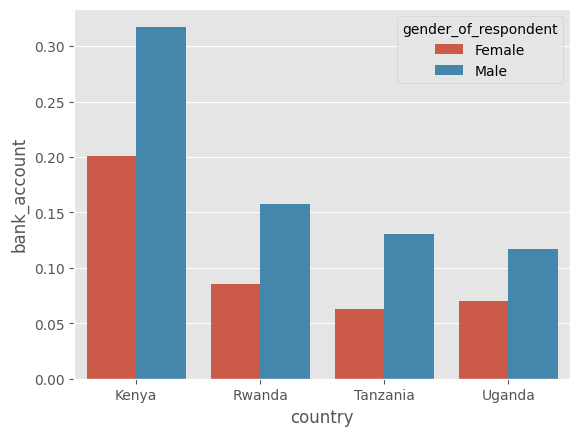

In [172]:
a = df.query('country== "Kenya" and bank_account == 1 and gender_of_respondent == "Male" ').count()
b = df.query('country == "Kenya" and gender_of_respondent == "Male" ').count()

c = df.query('country== "Kenya" and bank_account == 1 and gender_of_respondent == "Female" ').count()
d = df.query('country == "Kenya" and gender_of_respondent == "Female" ').count()

display ((a / b))
display (c / d)
#sns.barplot(data=df,x='country', y = 'bank_account', hue = 'location_type')
sns.barplot(data=df,x='country', y = 'bank_account', hue = 'gender_of_respondent', errorbar=None)

#d.h. 31 % aller Männer im Vgl. zu allen Männern in Kenya haben ein Bankkonto

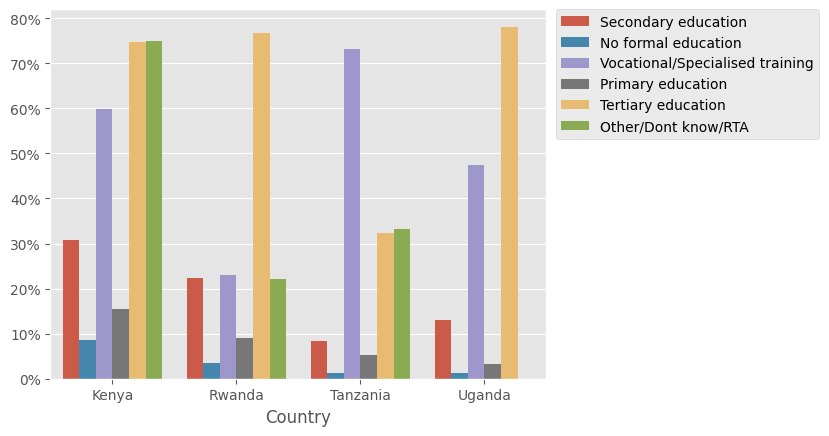

In [173]:
ax01 = sns.barplot(data=df,x='country', y = 'bank_account', hue = 'education_level',  errorbar=None)
plt.legend(bbox_to_anchor=(1.55, 1), loc='upper right', borderaxespad=0)
ax01.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xlabel('Country')
plt.ylabel('');

(0.0, 1.0)

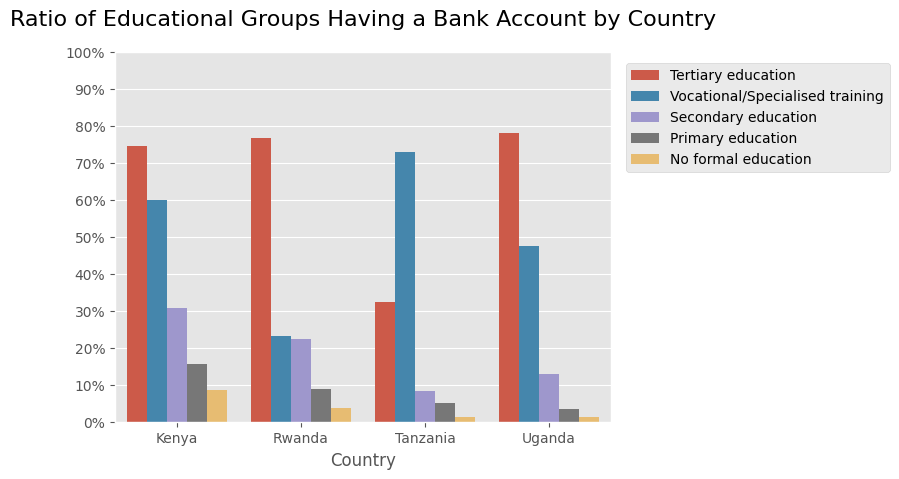

In [174]:
import numpy as np

hue = ['Tertiary education', 'Vocational/Specialised training', 'Secondary education','Primary education', 'No formal education']

ax10 = sns.barplot(data=df,x='country', y = 'bank_account', hue = 'education_level', hue_order= hue, errorbar=None)
plt.title('Ratio of Educational Groups Having a Bank Account by Country', loc = 'center', y=1.05, fontsize = 16 )
plt.legend(bbox_to_anchor=(1.03, 0.97), loc='upper left', borderaxespad=0)
ax10.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Country')
plt.ylabel('')
plt.ylim((0, 1))
#plt.title('Season Winners Goal and Win Regression', y=1.3, fontsize = 16);


In [175]:
df.education_level.unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

In [176]:
df.groupby(by='country').count().T

country,Kenya,Rwanda,Tanzania,Uganda
year,6068,8735,6620,2101
uniqueid,6068,8735,6620,2101
location_type,6068,8735,6620,2101
cellphone_access,6068,8735,6620,2101
household_size,6068,8735,6620,2101
age_of_respondent,6068,8735,6620,2101
gender_of_respondent,6068,8735,6620,2101
relationship_with_head,6068,8735,6620,2101
marital_status,6068,8735,6620,2101
education_level,6068,8735,6620,2101


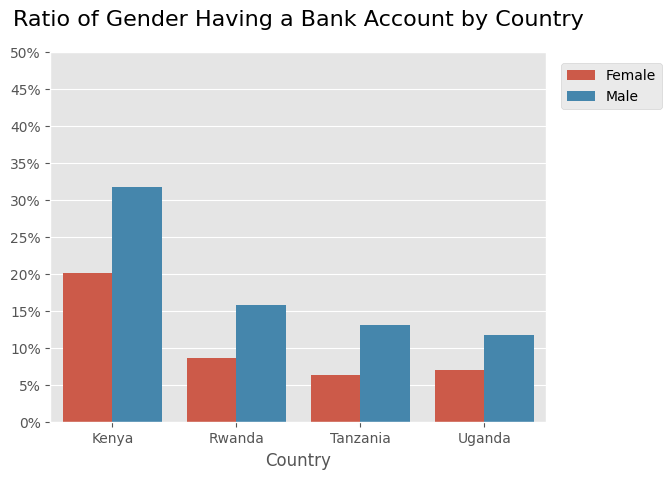

In [201]:
##1 Plot

plt.title('Ratio of Gender Having a Bank Account by Country', loc = 'center', y=1.05, fontsize = 16 )
ax = sns.barplot(data=df,x='country', y = 'bank_account', hue = 'gender_of_respondent', errorbar = None);
plt.xlabel('Country')
plt.ylabel('')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.yticks(np.arange(0, 0.55, 0.05))
plt.legend(loc = "upper right")
plt.legend(bbox_to_anchor=(1.03, 0.97), loc='upper left', borderaxespad=0);

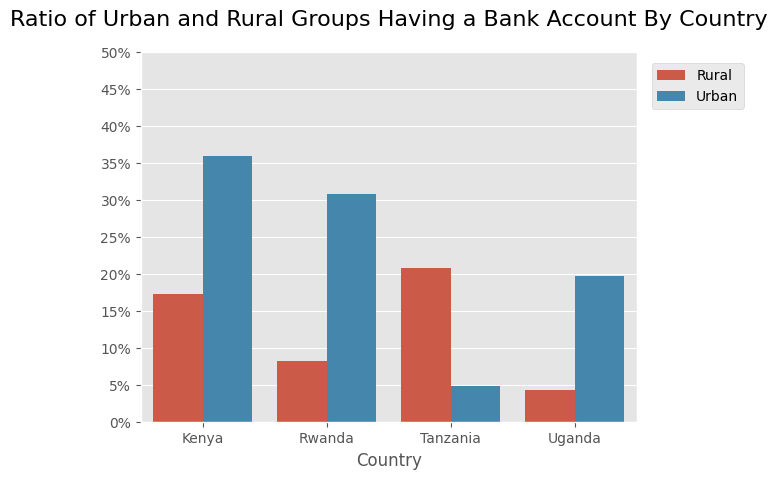

In [202]:
#2

ax100 = sns.barplot(data=df,x='country', y = 'bank_account', hue = 'location_type',errorbar = None)
plt.title('Ratio of Urban and Rural Groups Having a Bank Account By Country', loc = 'center', y=1.05, fontsize = 16 )
plt.title
#plt.title(hspace=0.5)
ax100.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xlabel('Country')
plt.ylabel('')
plt.yticks(np.arange(0, .55, 0.05))
plt.legend(loc = "upper right")
plt.legend(bbox_to_anchor=(1.03, 0.97), loc='upper left', borderaxespad=0);

In [194]:
df.columns

Index(['country', 'year', 'uniqueid', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type', 'bank_account', 'ages_binned'],
      dtype='object')

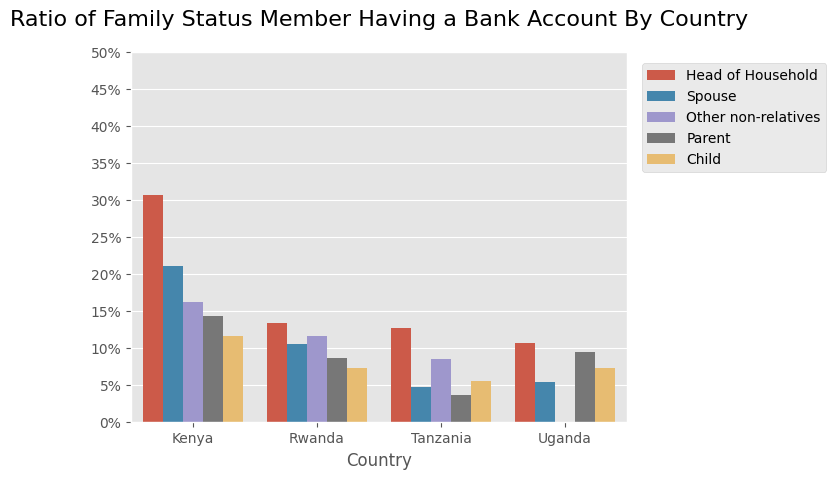

In [193]:
#3
hue = ['Head of Household', 'Spouse', 'Other non-relatives','Parent','Child']
ax110 = sns.barplot(data=df,x='country', y = 'bank_account', hue = 'relationship_with_head',hue_order= hue, errorbar = None)
plt.title('Ratio of Family Status Member Having a Bank Account By Country', loc = 'center', y=1.05, fontsize = 16 )
plt.title
#plt.title(hspace=0.5)
ax110.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xlabel('Country')
plt.ylabel('')
plt.yticks(np.arange(0, .55, 0.05))
plt.legend(loc = "upper right")
plt.legend(bbox_to_anchor=(1.03, 0.97), loc='upper left', borderaxespad=0);


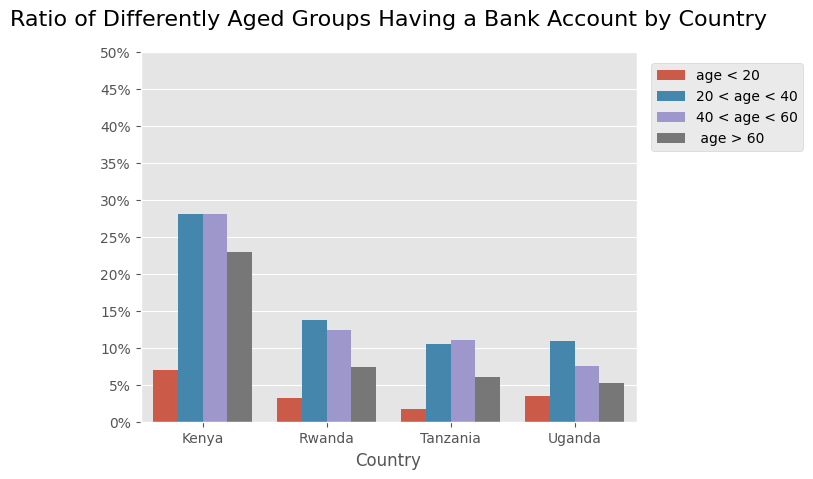

In [190]:
#4

ax130 = sns.barplot(data=df,x='country', y = 'bank_account', hue = 'ages_binned', errorbar = None)
plt.title('Ratio of Differently Aged Groups Having a Bank Account by Country', loc = 'center', y=1.05, fontsize = 16 )
plt.title
#plt.title(hspace=0.5)
ax130.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xlabel('Country')
plt.ylabel('')
plt.yticks(np.arange(0, .55, 0.05))
plt.legend(loc = "upper right")
plt.legend(bbox_to_anchor=(1.03, 0.97), loc='upper left', borderaxespad=0);


In [180]:
df.relationship_with_head.unique()
hue_order = ['Head of Household','Spouse', 'Child', 'Parent']

<Figure size 640x480 with 0 Axes>

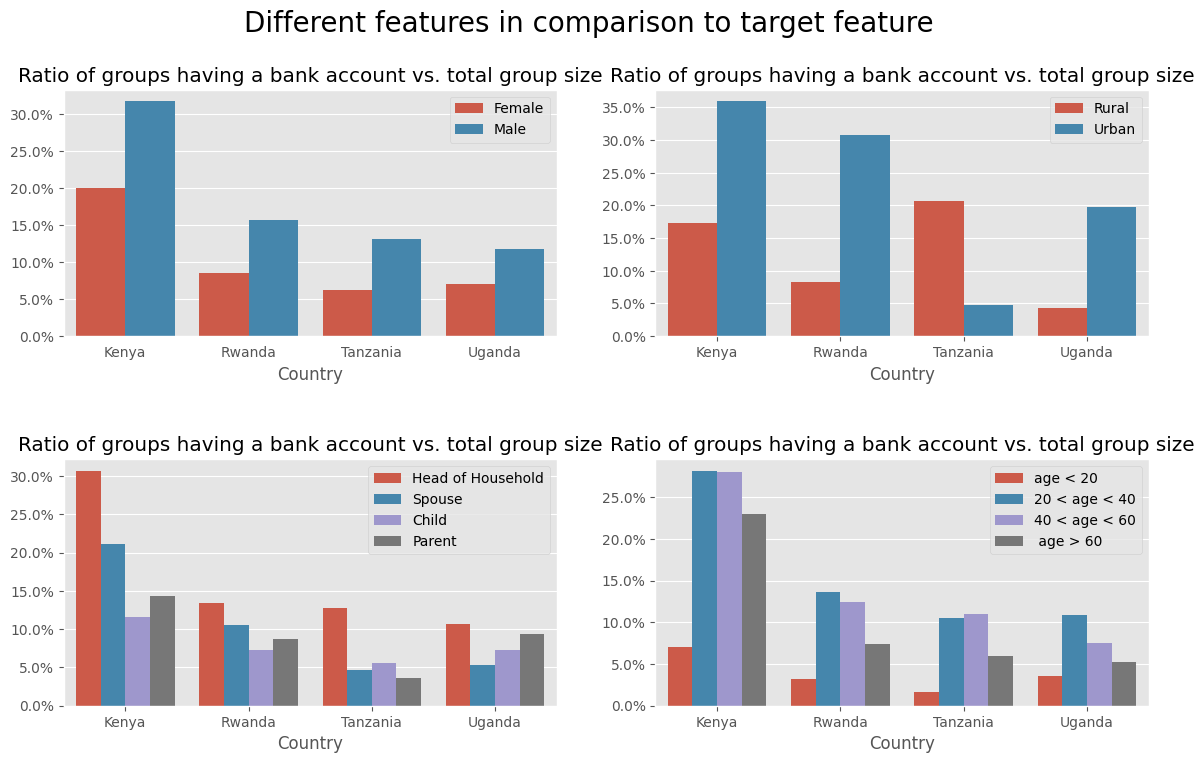

In [181]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


#f1 = df3.plot(kind = 'bar',x='Location',y='price') # das sollte ein ganz normaler pandas plot sein!

plt.figure()
plt.figure(figsize=(14,8))  # figsize=(float, float) : Width, height in inches
plt.suptitle("Different features in comparison to target feature", fontsize=20) # add a super title to the container
plt.subplots_adjust(hspace=0.5)
plt.style.use('ggplot')

#['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic',\
#  'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', \
# 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', \
# 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', \
# 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']

###########################
plt.subplot(2,2,1) # (rows, columns, panel number)
plt.title('Ratio of groups having a bank account vs. total group size')
ax = sns.barplot(data=df,x='country', y = 'bank_account', hue = 'gender_of_respondent', errorbar = None);
plt.xlabel('Country')
plt.ylabel('')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.tick_params(
    axis = 'x',
    which = 'both',
    bottom = False
    )
plt.legend(loc = "upper right");

#############################
plt.subplot(2,2,2)
ax2 = sns.barplot(data=df,x='country', y = 'bank_account', hue = 'location_type',errorbar = None)
plt.title('Ratio of groups having a bank account vs. total group size')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xlabel('Country')
plt.ylabel('')
plt.legend(loc = "upper right");

##############################
plt.subplot (2,2,3)
ax3 = sns.barplot(data=df,x='country', y = 'bank_account', hue = 'relationship_with_head',errorbar = None, hue_order= hue_order)
plt.title('Ratio of groups having a bank account vs. total group size')
ax3.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xlabel('Country')
plt.ylabel('')
plt.legend(loc = "upper right");

##############################
plt.subplot (2,2,4)
ax4 = sns.barplot(data=df,x='country', y = 'bank_account', hue = 'ages_binned',errorbar = None)
plt.title('Ratio of groups having a bank account vs. total group size')
ax4.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xlabel('Country')
plt.ylabel('')
plt.legend(loc = "upper right");

plt.show;

In [182]:
styles = plt.style.available
styles_red = styles[1:3]
for style in styles_red:
    pass

In [183]:
# # Make bins for age in train
# age_bins = pd.cut(df['age_of_respondent'], [0, 20, 40, 60, 200], labels=['age < 20', '20 < age < 40', '40 < age < 60', ' age > 60'])
# age_bins.name = 'ages_binned'

# df = df.join(age_bins, how='inner')
# #train = train.drop('age_of_respondent', axis=1)
# df.head(10)